
## MINI Project: LOGISTIC REGRESSION and SVM -- North Carolina Education Data Set

** Austin Hancock, Shravan Kuchkula, Kevin Okiah, Damarcus Thomas **

## Data ------> to be updated
* For this Analysis, we use modelingdata.csv  [`modelingdata.csv`](https://github.com/kevimwe/NC_EDUCATION_DATA/blob/master/NC_EDUC_Visualization_Data_Processing/data/) derived from for North Carolina Education Data.  Visualization and Data Preprocessing of `highschools_Final`,can be accessed from https://github.com/kevimwe/NC_EDUCATION_DATA/tree/master/NC_EDUC_Visualization_Data_Processing.

* Our begining dataset [`highschools.csv`](https://github.com/kevimwe/NC_EDUCATION_DATA/blob/master/NC_EDUC_Visualization_Data_Processing/data/) from the Prepocessing Phase and Visualization is a combination of multiple datatables preprocessed and cleaned for Machine learning Courtesy of DR. Drew. You can learn more on the data set from Dr.Drew's github https://github.com/jakemdrew/EducationDataNC.

In [34]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

#import required Libraries
import pandas as pd
import numpy as np

import os 
pd.set_option('display.max_colwidth', -1)
import requests
import io

# Import the stats library
from scipy import stats
import statsmodels.api as sm

# These are the plotting libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use("classic")
import seaborn as sns

#Machine learning
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score


# Command for plots to appear in the iPython Notebook
%matplotlib inline
#Starting with the dataset that Dr.Drew helped clean.->highschools saved to .cvs file from graduations rates (2) notebook
wd = os.getcwd() #get working directory

#Read in raw data

url="https://raw.githubusercontent.com/kevimwe/NC_EDUCATION_DATA/master/NC_EDUC_Visualization_Data_Processing/data/All_Data_By_School_Final.csv"
s=requests.get(url).content

schoolData=pd.read_csv(io.StringIO(s.decode('utf-8')))

url="https://raw.githubusercontent.com/kevimwe/NC_EDUCATION_DATA/master/NC_EDUC_Visualization_Data_Processing/data/1516_Test_Scores.csv"
t=requests.get(url).content

testScores=pd.read_csv(io.StringIO(t.decode('utf-8')))

#Review raw data before the join
schoolData.info()

#join files using school / unit code
schools = schoolData.join(testScores, on='unit_code',how='left', lsuffix='_schoolData', rsuffix='_testScores')
#highschools = pd.read_csv(wd+'/data/highschools.csv', low_memory=False)
#highschools = pd.read_csv(wd+'\\data\\highschools.csv', low_memory=False)
schools.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 293 entries, Year to State_Prin_Exp_Pct_10+_Years
dtypes: float64(255), int64(17), object(21)
memory usage: 5.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 305 entries, Year to Percent GLP
dtypes: float64(262), int64(17), object(26)
memory usage: 6.0+ MB


### Data Meaning Type 

In [35]:
url = 'https://raw.githubusercontent.com/kevimwe/NC_EDUCATION_DATA/master/NC_EDUC_Visualization_Data_Processing/data/DataMeaningType.csv'

s=requests.get(url).content
pd.set_option('display.max_rows', 500) 
pd.set_option('display.max_colwidth', 150)
pd.read_csv(io.StringIO(s.decode('utf-8')))


,Attribute,Meaning,Type
0,unit_code,Code to identify School/LEA/State,Object
1,type_cd_txt,Type of school (Chater or Public),Object
2,category_cd,"Category of School (E, M, H, I, T, or A)",Object
3,school_type_txt,Description of School type,Object
4,calendar_only_txt,Description of Calendar (Traditional or Year-Round),object
5,title1_type_flg,Title I Status,bool
6,clp_ind_flg,Consistently low performing school,bool
7,focus_clp_flg,Focus school designation based on CLP,bool
8,summer_program_flg,Summer school program included in Read to Achieve results,bool
9,asm_no_spg_flg,No School Performance Grade due to alternative school status,bool


#### Data Dictionary
> Since this datasets has numerous columns we needed a fast way to quickly find ColumnName description for easy reference. For exceptional work, we created a function to quickly pull the data from csv datafile. This involved converting the pdf to excel and formating the data for easy import into pandas. The code below is a working code for our data dictionary.

In [5]:

DataDict=pd.read_csv(io.StringIO(s.decode('utf-8')))

DataDict.head()
#DataDict = DataDict.columns['COLUMN_NAME', 'DESCRIPTION']
def get_ColDescription(colname = 'Year'):
    colName = input("Enter column name to check description in Dictionary. You can enter multiple columns separated by comma: ")
    
    print('You entered: ', colName.strip())
    temp = pd.DataFrame()
    colNames = colName.split(',')
    
    try:
        for i in range(0,len(colNames)):
            get = (DataDict[DataDict.Attribute==colNames[i].strip().lower()])
            temp = temp.append(get)
        return(temp)
    except Exception as e:
        print(e.args) 

get_ColDescription()

Enter column name to check description in Dictionary. You can enter multiple columns separated by comma: 
You entered:  


,Attribute,Meaning,Type


### Data Quality

In [36]:
#Make a copy of the dataset to work with
schoolData = schools.copy()

schoolData.shape

(2579, 305)

##### *Missing Data Statistics*

> In this section we explore missing data in the highschool data that was created from the original north carolina data. After exploring the missing data we will discusss the approach for handling them.

In [37]:
#Check for missing values
Temp = pd.DataFrame(schoolData.isnull().sum())
#print(Temp)
Temp.columns =['DataMissing']
#Columns with atleast 1 missing value
MissingCount = Temp[Temp.DataMissing>0]

#sort 
MissingCount = MissingCount.sort_values('DataMissing',ascending=False)
#basic starts on missing data
print("##################################################")
print("###", '             Stats on missing data        ',  "###")
print("##################################################")
print('No of rows in schoolData: ',len(schoolData))
print('No of Columns in schoolData: ',len(schoolData.columns))
print('No. of Columns with Missing data: ',len(MissingCount))
print('No  of Complete data columns: ', len(schoolData.columns) - len(MissingCount))
print('No. of Columns with 100% missing Values: ',sum(1 for item in MissingCount.DataMissing if item==len(schoolData)))
print('No. of Columns more than 95% missing Values: ',sum(1 for item in MissingCount.DataMissing if item>=0.95*len(schoolData)))
print('% of Columns with some Missing data: ',round(float(100*len(MissingCount))/len(schoolData.columns),3),'%')
print('% of Columns with 100% Missing data: ',round(float(100*sum(1 for item in MissingCount.DataMissing if item==len(schoolData)))/len(schoolData.columns),3),'%')
print('% of Columns with more than 95% Missing data: ',round(float(100*sum(1 for item in MissingCount.DataMissing if item>=0.95*len(schoolData)))/len(schoolData.columns),3),'%')

print(" ")
print("##################################################")
print("###",'       Columns with >95% missing data     ',    "###")
print("##################################################")
#add a columnName for Bar charts plot
MissingCount['ColumnName'] = MissingCount.index
MissingCount['Missing %'] = 100*(MissingCount.DataMissing/len(schoolData))
MissingCount = MissingCount.reset_index()
del MissingCount['index']
print((MissingCount.head(50)))

##################################################
###              Stats on missing data         ###
##################################################
No of rows in schoolData:  2579
No of Columns in schoolData:  305
No. of Columns with Missing data:  228
No  of Complete data columns:  77
No. of Columns with 100% missing Values:  32
No. of Columns more than 95% missing Values:  39
% of Columns with some Missing data:  74.754 %
% of Columns with 100% Missing data:  10.492 %
% of Columns with more than 95% Missing data:  12.787 %
 
##################################################
###        Columns with >95% missing data      ###
##################################################
    DataMissing                ColumnName   Missing %
0          2579               Percent GLP  100.000000
1          2579            prin_other_pct  100.000000
2          2579           Percent Level 5  100.000000
3          2579         GCE_RPF_State_Pct  100.000000
4          2579           Percent Level

> From above we note, of the 305 columns in SchoolData, 228 (74.8%) of them have some missing data. 32(10.5%) of columns have all the data missing where 39 (12.8%) of the columns miss more than 95% of the data. For columns with 100% missing data we are left but to wonder if this were new fields introduced recently and the schools are not fully informed to collect this data or the data for this columns was not just collected by mistake. On the other hand, for the partally completed datasets, some schools might have left these columns blank if they didn't apply to them.

> For the sake of this analysis we will drop the columns that have `>95` missing data rather than try complete the missing data with either mean, median or mode. If we complete this large amount of missing rows of data with predetermined data, our model maybe baised and throw were predictions off.

In [38]:
#All columns from Original schoolData
AllColumns =schoolData.columns 

# All columns with some missing value
ColumnsWithMissingdata = MissingCount.ColumnName 

#columns with more than 95% missing data
Columns2Drop = MissingCount.ColumnName.head(38) 

#columns with missing values that are kept
Columns2Keep = MissingCount.ColumnName.tail(len(MissingCount)-99) 

#All the other columns except those with >95% missing data
SelectedColumns = list(set(AllColumns)-set(Columns2Drop)) 

#new dataset, columns with >95% missing data dropped

schoolDataNew = schoolData[SelectedColumns]

#drop the key column. 
del schoolDataNew['unit_code']

print("##################################################")
print("###", '          Orginal Highschooldata info     ',  "###")
print("##################################################")
print(schoolData.info())
print("##################################################")
print("###", '  Columns with >95 data missing   dropped ',  "###")
print("##################################################")
print(schoolDataNew.info())
schoolDataNew.head(5)


##################################################
###           Orginal Highschooldata info      ###
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 305 entries, Year to Percent GLP
dtypes: float64(262), int64(17), object(26)
memory usage: 6.0+ MB
None
##################################################
###   Columns with >95 data missing   dropped  ###
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 266 entries, avg_age_media_collection to st_not_highqual_class_lp_pct
dtypes: float64(229), int64(17), object(20)
memory usage: 5.2+ MB
None


,avg_age_media_collection,Read Score,Avg_State_Size_EnglishII,lea_cte_courses,szip_ad,st_wap_num,sat_participation_pct,st_total_specialized_courses,Avg_Dist_Size_04,st_supplies_expense_pct,...,st_ib_pct_4_or_above,SPG Grade,New_ind_Txt,st_avg_daily_attend_pct,lea_benefits_expense_pct,advance_dgr_pct,Avg_State_Size_00,English II Score,Avg_Class_Size_01,st_not_highqual_class_lp_pct
0,NaN,NaN,18.0,NaN,28115,111757,0.92,NaN,NaN,0.075,...,0.75,NaN,School Is Not New,0.958,NaN,NaN,19.0,NaN,18.0,0.024
1,NaN,NaN,18.0,NaN,27560,111757,NaN,NaN,NaN,0.075,...,0.75,NaN,School Is Not New,0.957,NaN,NaN,19.0,NaN,NaN,0.024
2,NaN,NaN,18.0,NaN,27253,111757,0.43,NaN,NaN,0.075,...,0.75,NaN,School Is Not New,0.951,0.212,0.143,NaN,NaN,NaN,0.024
3,2001.0,NaN,NaN,NaN,27253,111757,NaN,NaN,21.0,0.075,...,0.75,NaN,School Is Not New,0.952,0.212,0.194,19.0,NaN,19.0,0.024
4,2000.0,NaN,NaN,NaN,27244,111757,NaN,NaN,21.0,0.075,...,0.75,NaN,School Is Not New,0.952,0.212,0.529,19.0,NaN,18.0,0.024


> In the code block above, we drop 38 columns which have >95% of the data missing. We also delete the unit_code column which is a key to identify the school/Lea/state. 

In [39]:
#Exploring the columns with missing dataset that are retained
df = schoolDataNew[Columns2Keep]
temp_df = df.copy() 
print("##################################################")
temp  = df.select_dtypes(include=['int','float'])
temp2  = df.select_dtypes(include=['object', 'bool'])
print("#      Columns with continious data (int, float) #")
print("##################################################")
temp.info()
print(" ")
print("##########################################")
print("#     Columns with Categorical data      #")
print("##########################################")
temp2.info()
print(" ")
print("Total # of columns: ",len(Columns2Keep))

##################################################
#      Columns with continious data (int, float) #
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Columns: 120 entries, lea_ib_pct_4_or_above to class_teach_num
dtypes: float64(120)
memory usage: 2.4 MB
 
##########################################
#     Columns with Categorical data      #
##########################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2579 entries, 0 to 2578
Data columns (total 9 columns):
Reading SPG Grade       1870 non-null object
Math SPG Grade          1870 non-null object
EVAAS Growth Status     2312 non-null object
grades_1_to_1_access    2313 non-null object
Byod                    2313 non-null object
1_to_1_access           2313 non-null object
grades_BYOD             2313 non-null object
SPG Grade               2364 non-null object
calendar_only_txt       2578 non-null object
dtypes: object(9)
memory u

> In the code block above we explore the columns with missing data that we retained. we group the columns into two based on data type as we will have two different approaches for replacing the missing data;
1. #### Columns with continuous data types (ints and floats)
Of the 129 columns retained with missing data, 120 are of dtype float64. After reviewing individual columns description from the data dictionary, we choose to replace these missing float types with median. We didn't go with mean simply because with existance of outliers, mean would be screwed compared to median.
2. #### Columns with contegorical data types (objects and bool)
For the 9 categorical columns, we will be replacing the missing values with mode.

In [40]:
#this function replaces NA's for columns with continous 'Con' (int or float) variables with median and categorical 'Cat' variable(bool or object) with mode
def ReplaceMissingdata(df = schoolDataNew):
    temp_df = df.copy() 
    print("#######################################")
    print("## continous and categorical columns ##")
    print("#######################################")
    temp  = df.select_dtypes(include=['int64','float'])    #continuous values columns
    columnnames = temp.columns
    temp1  = df.select_dtypes(include=['object','bool']) #catagorical values columns
    columnnames1 = temp1.columns
    print(" ")
    
    print("##############################")
    print("## NA count Before Cleaning ##")
    print("##############################")
    print(df.isnull().sum())
    #replacing missing continous values with median
    for i in range(0,len(columnnames)):
        try:
            temp_array =temp[temp[columnnames[i]]!=np.nan][columnnames[i]] #temp array of non NAs for continous values to calculate median
            # replace NAs with median for continous variables created from above arrays
            temp_df[columnnames[i]] =temp_df[columnnames[i]].replace(np.nan,temp_array.median())     
        except Exception as e:
            print(e.args) 
            
    #replacing missing contegorical values with mode
    for i in range(0,len(columnnames1)):
        try:
            temp_array1 =temp1[temp1[columnnames1[i]]!=np.nan][columnnames1[i]] #temp array of non NAs for categorical values to calculate mode
            # replace NAs with median for categorical values created from above arrays with mode
            temp_df[columnnames1[i]] =temp_df[columnnames1[i]].replace(np.nan,str(temp_array1.mode()[0]))      
        except Exception as e:
            print(e.args)

    print("##############################")
    print("## NA Count After Cleaning  ##")
    print("##############################")
    print(temp_df.isnull().sum())
    df = temp_df
    return df

new_schooldata = ReplaceMissingdata(schoolDataNew)    

new_schooldata.info()

#######################################
## continous and categorical columns ##
#######################################
 
##############################
## NA count Before Cleaning ##
##############################
avg_age_media_collection                           266
Read Score                                         709
Avg_State_Size_EnglishII                          1434
lea_cte_courses                                   2036
szip_ad                                              0
st_wap_num                                           0
sat_participation_pct                             2042
st_total_specialized_courses                      1971
Avg_Dist_Size_04                                  1289
st_supplies_expense_pct                              0
RETAINED_School_Pct                               1926
Avg_Class_Size_07                                 1915
services_expense_pct                              2419
st_long_susp_per_c_num                               0
Avg_Class_Size_

> In the code block above, we replaced missing catagorical values with mode and missing continuous values with median. A total of 129 columns with missing values have been cleaned

In [41]:
new_schooldata.shape

(2579, 266)

category_cd
A      63
E    1320
H     505
I     142
M     478
T      71
dtype: int64

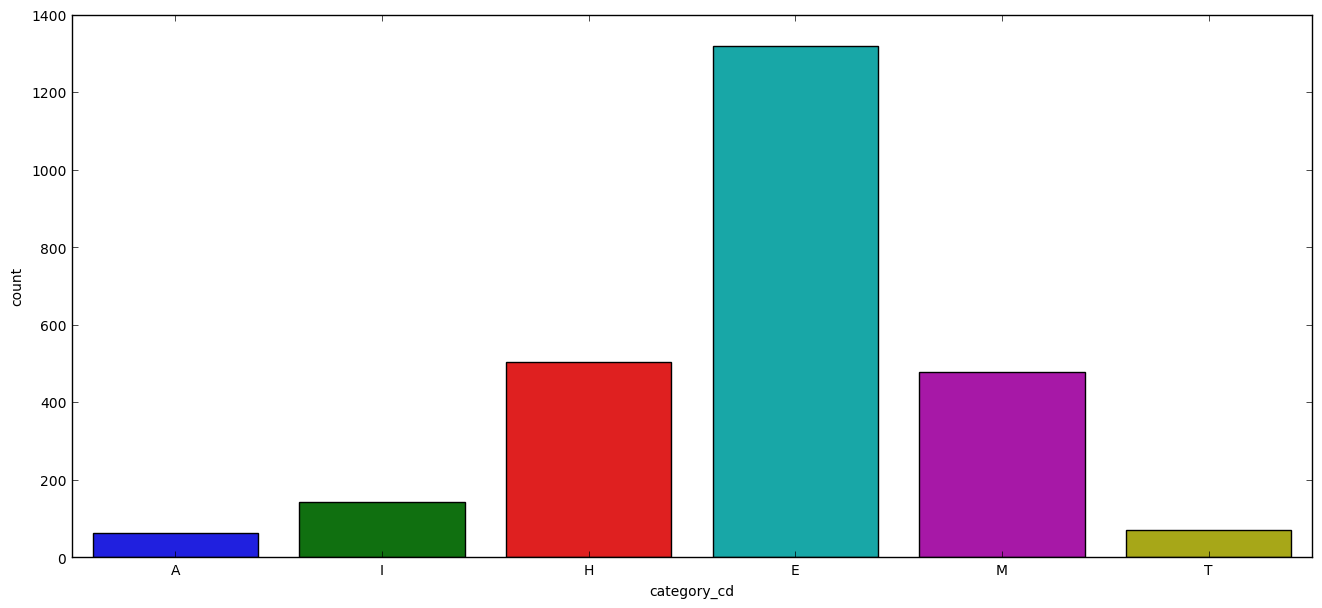

In [42]:
# School Category Factor plot 
fig, ax = plt.subplots(figsize=(16, 7))
sns.countplot("category_cd",data=new_schooldata)
new_schooldata.groupby(["category_cd"]).size()

>  See summary table below for school category descriptions and % distribution

Category | Description|Count |Percentage
--- | --- | ---|---
A | School has elementary, middle, and high school grades  | 63|2.44%
E | School has elementary schools grades (PK-5) | 1320|51.18%
H | School has high schools grades (9-13)  | 505|19.58%
I | Schools with elementary, middle and high school grades | 142|5.51%
M | School has middle schools grades (6-8)  | 478|18.53%
T | School has middle and high school grades | 71|2.75%

### New Features

In [43]:
#1
#################################################
#               New Features                    #
#################################################
# create Factors for 'Overall Achievement Score'
# A: 85-100
# B: 70-84
# C: 55-69
# D: 40-54
# F:<40
new_schooldata = new_schooldata.assign(Overall_Achievement_Score_bins = pd.cut(np.array(new_schooldata['Overall Achievement Score']), 
                                              5, labels=["<40", "40-54", "55-69",'70-84',"85-100"]))
#2
#SchoolWeightedScore:  Summation of all achievement measures Scores.
bin1 = ['EVAAS Growth Score','Overall Achievement Score' ] # Weight 0.6
bin2 = ['The ACT Score','ACT WorkKeys Score' ,'Math Course Rigor Score'] # weight 0.3
bin3 = ['Math I Score', 'English II Score','Biology Score'] # EOC scores weight 0.1
#print(Achievement_measures)
new_schooldata = new_schooldata.assign(BIN1=new_schooldata[bin1].sum(axis=1)*.6)
new_schooldata = new_schooldata.assign(BIN2=new_schooldata[bin2].sum(axis=1)*.3)
new_schooldata = new_schooldata.assign(BIN3=new_schooldata[bin3].sum(axis=1)*.1)
groupedbins = ['BIN1','BIN2','BIN3']
new_schooldata = new_schooldata.assign(SchoolWeightedScore = new_schooldata[groupedbins].sum(axis =1))


School_Final = new_schooldata.drop(groupedbins, 1)
School_Final.T


,0,1,2,3,4,5,6,7,8,9,...,2569,2570,2571,2572,2573,2574,2575,2576,2577,2578
avg_age_media_collection,2000,2000,2000,2001,2000,2002,2009,2006,1998,1996,...,2000,2000,2006,2000,2000,2009,2000,2006,2000,2000
Read Score,56,56,56,56,56,56,56,56,56,56,...,86,35,56,56,81,28,57,55,47,64
Avg_State_Size_EnglishII,18,18,18,18,18,18,18,18,18,18,...,18,18,18,18,18,18,18,18,18,18
lea_cte_courses,0.700774,0.700774,0.700774,0.700774,0.700774,0.700774,0.700774,0.700774,0.700774,0.700774,...,0.700774,0.700774,0.700774,0.700774,0.700774,0.700774,0.700774,0.700774,0.700774,0.700774
szip_ad,28115,27560,27253,27253,27244,27217,27217,27215,27302,27302,...,27587,27844,27610,27846,28607,27530,27530,28676,27893,27896
st_wap_num,111757,111757,111757,111757,111757,111757,111757,111757,111757,111757,...,111757,111757,111757,111757,111757,111757,111757,111757,111757,111757
sat_participation_pct,0.92,0.45,0.43,0.45,0.45,0.45,0.45,0.45,0.45,0.58,...,0.45,0.62,0.45,0.36,0.45,0.45,0.45,0.45,0.45,0.45
st_total_specialized_courses,0.964635,0.964635,0.964635,0.964635,0.964635,0.964635,0.964635,0.964635,0.964635,0.964635,...,0.964635,0.964635,0.964635,0.964635,0.964635,0.964635,0.964635,0.964635,0.964635,0.964635
Avg_Dist_Size_04,21,21,21,21,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
st_supplies_expense_pct,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075,...,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075,0.075


> From above code, we have created two new features from our dataset.

> 1. Overall_Achievement_Score_bins:
this is to groub the Overall Achievement Score into bins 
A: 85-100,
B: 70-84,
C: 55-69,
D: 40-54,
F:<40
> 2. SchoolWeightedScore: Summation of all achievement measures Scores.`EVAAS Growth Score` and `Overall Achievement Score` are put on bin1 and given a  weight 0.6 of the overall weighted school school.`The ACT Score`, `ACT WorkKeys Score` , and `Math Course Rigor Score` are put in bin 2 carrying a weight of 0.3 while bin3 contains End of Course scores for `Math I Score`, `English II Score`, and `Biology Score` given a weight 0.1. When we get to lab two, we will use this features to see if they improve our model performance.


### moving forward we will use this data with the new created features for modeling

In [44]:
modelingdata=School_Final.copy()

In [50]:
flags = modelingdata.columns[modelingdata.columns.str.contains('flg')]
allFlags = modelingdata.loc[:, list(flags)]



In [32]:
#sk
modelingdata.shape

(2579, 268)

In [33]:
# create a csv file using modelingdata
#modelingdata.to_csv("modelingdata_sk.csv", index=False)
modelingdata.to_pickle('modelingdata.pickle')

In [28]:
#url="https://raw.githubusercontent.com/kevimwe/NC_EDUCATION_DATA/master/NC_EDUC_Visualization_Data_Processing/data/modelingdata.csv"
s=requests.get(url).content

#modelingdata=pd.read_csv(io.StringIO(s.decode('utf-8')))
modelingdata.head()

,avg_age_media_collection,Read Score,Avg_State_Size_EnglishII,lea_cte_courses,szip_ad,st_wap_num,sat_participation_pct,st_total_specialized_courses,Avg_Dist_Size_04,st_supplies_expense_pct,...,New_ind_Txt,st_avg_daily_attend_pct,lea_benefits_expense_pct,advance_dgr_pct,Avg_State_Size_00,English II Score,Avg_Class_Size_01,st_not_highqual_class_lp_pct,Overall_Achievement_Score_bins,SchoolWeightedScore
0,2000.0,56.0,18.0,0.700774,28115,111757,0.92,0.964635,21.0,0.075,...,School Is Not New,0.958,0.210,0.268,19.0,60.0,18.0,0.024,55-69,173.07
1,2000.0,56.0,18.0,0.700774,27560,111757,0.45,0.964635,21.0,0.075,...,School Is Not New,0.957,0.210,0.268,19.0,60.0,19.0,0.024,55-69,173.07
2,2000.0,56.0,18.0,0.700774,27253,111757,0.43,0.964635,21.0,0.075,...,School Is Not New,0.951,0.212,0.143,19.0,60.0,19.0,0.024,55-69,173.07
3,2001.0,56.0,18.0,0.700774,27253,111757,0.45,0.964635,21.0,0.075,...,School Is Not New,0.952,0.212,0.194,19.0,60.0,19.0,0.024,55-69,173.07
4,2000.0,56.0,18.0,0.700774,27244,111757,0.45,0.964635,21.0,0.075,...,School Is Not New,0.952,0.212,0.529,19.0,60.0,18.0,0.024,55-69,173.07


In [13]:
modelingdata.shape

(2579, 268)

In [14]:
modelingdata.Overall_Achievement_Score_bins.head()

0    55-69
1    55-69
2    55-69
3    55-69
4    55-69
Name: Overall_Achievement_Score_bins, dtype: category
Categories (5, object): [<40 < 40-54 < 55-69 < 70-84 < 85-100]

> # LOGISTIC REGRESSION and SUPPORT VECTOR MACHINE

### SECTION 1  [50 Points ]: 
1. Create a logistic regression model and a support vector machine model for the classification task involved with your dataset.

2. Assess how well each model performs (use 80/20 training/testing split for your data). 
3. Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. 
4. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 

#### Selecting Catgorical columns for logistic regression

From table able, we have selected to build a logistic regression model to predict if a school has summer program depicted by `summer_program_flg` based on all the other features.

In [51]:
#Create data = x
df_X = modelingdata.copy()
#create target = Y
df_y = df_X.summer_program_flg
print('X shape before ')
print(df_X.shape)
#drop the response column from the x dataset
df_X.pop('summer_program_flg')
print('X shape after ')
print(df_X.shape)
print('Y shape after ')
print(df_y.shape)

X shape before 
(2579, 268)
X shape after 
(2579, 267)
Y shape after 
(2579,)


In [54]:
#create dummy variables
dum_y = -df_y
print(df_y.value_counts())
print(dum_y.value_counts())

 0    1702
-1     877
Name: summer_program_flg, dtype: int64
0    1702
1     877
Name: summer_program_flg, dtype: int64


In [55]:
-

Index(['grades_1_to_1_access', 'type_cd_txt', 'Reading SPG Grade', 'Byod',
       'Grad_project_status', 'esea_status', 'school_type_txt',
       'Math SPG Grade', 'Closed_Ind_Text', 'category_cd', 'state_ad',
       '1_to_1_access', 'grades_BYOD', 'State Gap Compared',
       'EVAAS Growth Status', 'calendar_only_txt', 'SPG Grade', 'New_ind_Txt',
       'Overall_Achievement_Score_bins'],
      dtype='object')
['summer_program_flg']
['avg_age_media_collection', 'Read Score', 'Avg_State_Size_EnglishII', 'lea_cte_courses', 'szip_ad', 'st_wap_num', 'sat_participation_pct', 'st_total_specialized_courses', 'Avg_Dist_Size_04', 'st_supplies_expense_pct', 'RETAINED_School_Pct', 'Avg_Class_Size_07', 'services_expense_pct', 'st_long_susp_per_c_num', 'Avg_Class_Size_04', 'st_prinyrs_0thru3_pct', 'st_emer_prov_teach_pct', 'other_expense_pct', 'Avg_Class_Size_00', 'GCE_ALL_School_Pct', 'st_wap_per_classroom', 'lea_sat_participation_pct', 'books_per_student', 'Avg_Class_Size_Biology', 'GCE_RPF_Schoo

> The function above creates dummy fariables for all the categorical features and deletes the old features. It returns a dataframe with the newly minted features

In [54]:
df_X.head()

,Math Course Rigor Score,st_prinyrs_4thru10_pct,lea_ap_pct_3_or_above,lea_total_specialized_courses,st_stud_internet_comp_num,Avg_Dist_Size_02,st_long_susp_per_c_num,st_books_per_student,st_avg_age_media_collection,nat_sat_avg_score_num,...,Math SPG Grade_D,Math SPG Grade_F,Byod_-,Byod_No,Byod_Yes,Overall_Achievement_Score_bins_<40,Overall_Achievement_Score_bins_40-54,Overall_Achievement_Score_bins_55-69,Overall_Achievement_Score_bins_70-84,Overall_Achievement_Score_bins_85-100
0,100.0,0.427,0.48,1.0,1.2,19.0,0.06,19.18,2000.0,1006.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,100.0,0.427,0.48,1.0,1.2,19.0,0.06,19.18,2000.0,1006.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,100.0,0.427,0.37,1.0,1.2,19.0,0.07,19.18,2000.0,1006.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,100.0,0.427,0.37,1.0,1.2,19.0,0.06,19.18,2000.0,1006.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,100.0,0.427,0.37,1.0,1.2,19.0,0.06,19.18,2000.0,1006.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


> in above code, we split that data into x and y for modeling

In [56]:
print(df_X.shape)
print(df_y.shape)

(2579, 397)
(2579,)


#### Split dataset into training and test dataset

> We split our data into 80% instances for training and the remaining 20% for testing. 

> For the purposes of cross validation, we repeat this process of separating the testing and training data 10 times. We will use this cross validation method built into scikit-learn.

In [55]:
#create test and training sets from data and target created above
X_train,X_test,y_train,y_test = train_test_split(df_X, df_y, test_size = 0.2, random_state = 4)

#####  Function to Run logistic regression  and generate performance measures

Below function below is derived  from DR Larsons starting code on logistics regression

In [56]:
# function to run SVM

#### Trial logistic regression on the raw dataset.

#### RUN CORRELATION to get the highly correlated columns to eliminnate

In [57]:
#finding a list of the most correlated features
print('X df before running correlation')
print(df_X.shape)
c = df_X.corr().abs()
s =pd.DataFrame(c.unstack())
#so = s.order(kind="quicksort")
s['Correlation Pair'] = s.index
s = s.reset_index()
#del s['index']
s.columns = ['Column1', 'Column2', 'correlation','Correlation Pair']
result = s.sort_values('correlation', ascending=0)



#filter to correlation between range
result1 =  result[(result.correlation < 0.95)]

result1
#combine the columns into a list
col= pd.DataFrame(result1.Column1)
col.columns = ['Columns']
col1 =pd.DataFrame(result1.Column2)
col1.columns = ['Columns']
df = col.append(col1)

#find only unique columns
UniqueColumns =pd.unique(df.Columns)

df_X = df_X[UniqueColumns]

#shape on the new df_X
df_X.reset_index()
df_y.reset_index()
print('X df after running correlation')
print(df_X.shape)
result.head()

X df before running correlation
(2579, 397)
X df after running correlation
(2579, 371)


,Column1,Column2,correlation,Correlation Pair
2762,st_long_susp_per_c_num,category_cd_H,1.0,"(st_long_susp_per_c_num, category_cd_H)"
150866,category_cd_H,st_long_susp_per_c_num,1.0,"(category_cd_H, st_long_susp_per_c_num)"
62091,lea_not_highqual_class_lp_pct,lea_highqual_class_lp_pct,1.0,"(lea_not_highqual_class_lp_pct, lea_highqual_class_lp_pct)"
63279,lea_highqual_class_lp_pct,lea_not_highqual_class_lp_pct,1.0,"(lea_highqual_class_lp_pct, lea_not_highqual_class_lp_pct)"
24268,st_salary_expense_pct,st_prin_male_pct,1.0,"(st_salary_expense_pct, st_prin_male_pct)"


In the code block above we find the run correlation on the X df to identify the most strongly correlated features >0.95 and remove them.  25 features are eliminated for being highly correlated.

## Feature selection

Below we select top  features using chi-squared test
 
##### Systematic feature selection to find the best percentile using cross-validation.
In the section below, we perform a systematic feature selection to identify thee optimal number of features that we need to fit our data the best.
Reference:
>https://nbviewer.jupyter.org/url/bmobasher.com/Class/CSC478/Titanic.ipynb 

>http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html

2 0.67568523115
12 0.699506692147
22 0.70435685103
32 0.703357513655
42 0.720773751995
52 0.72370522705
62 0.717365992327
72 0.722692069733
82 0.724139136611
92 0.724120282915
('only integer scalar arrays can be converted to a scalar index',)


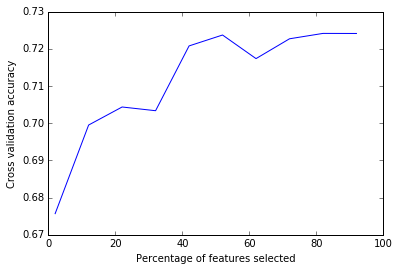

In [58]:

from sklearn import cross_validation
from sklearn import feature_selection
from sklearn.linear_model import LogisticRegression
dt = LogisticRegression( C=1, class_weight=None) 

percentiles = range(2, 100, 10)
results = []
for i in range(2, 100, 10):
    #fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=i)
    X_train_fs = fs.fit_transform(X_train, y_train)
    scores = cross_validation.cross_val_score(dt, X_train_fs, y_train, cv=20)
    print(i,scores.mean())
    results = np.append(results, scores.mean())
try:
    optimal_percentile = np.where(results == results.max())[0]
    print("Optimal percentile of features:{0}".format(percentiles[optimal_percentile]), "\n")
    optimal_num_features = int(percentiles[optimal_percentile]*len(X.columns)/100)
    print("Optimal number of features:{0}".format(optimal_num_features), "\n")
    print(dt.get_params())
except Exception as e:
    print(e.args)
# Plot percentile of features VS. cross-validation scores
import pylab as pl
pl.figure()
pl.xlabel("Percentage of features selected")
pl.ylabel("Cross validation accuracy")
pl.plot(percentiles,results)

> > From above figure of cross validation accuracy vs percentage of features selected, 20% of the features gives us the best perfoming model that fits our data.

In [59]:
from sklearn import feature_selection
fs = feature_selection.SelectPercentile(feature_selection.chi2, percentile=20)
df_X_train_fs = fs.fit_transform(X_train, y_train)

np.set_printoptions(suppress=True, precision=2, linewidth=80)
print(fs.get_support())
print(fs.scores_)
print('')

[False False  True False False  True False False False False False False False
 False False False False  True  True False False False False  True False False
 False False False  True  True False False False  True False False False False
 False False False  True False False  True False False False False  True False
  True False False False False False False False False False False False False
 False  True False False False  True False  True False  True  True False False
 False False False False False False False  True False  True False False False
 False  True False  True  True False False False False False  True  True False
 False False  True  True False False False  True False False False  True False
 False  True False False False False False  True  True False False False False
  True False  True False False False False False False False False False  True
  True False  True False False False False False  True False False  True False
 False False False False False False False False  Tr

> In the code above, we select 60% of the features in our training set based on Chi2 test.

In [60]:
Chi2_Score = pd.DataFrame()

for i in range(len(df_X.columns.values)):
    if fs.get_support()[i]:
        #print(df_X.columns.values[i],'\t', fs.scores_[i] )
        Feature ={'Feature': df_X.columns.values[i], 'chi-squared':fs.scores_[i]}
        Chi2_Score =Chi2_Score.append(Feature, ignore_index=True)
Chi2_Score       

,Feature,chi-squared
0,st_tchyrs_4thru10_pct,5.068380
1,RETAINED_Dist_Pct,5.265193
2,State Gap Compared_N,30.686806
3,State Gap Compared_Y,31.973438
4,Read Score,17.323373
5,st_tchyrs_11plus_pct,11.799992
6,The ACT Score,578.095338
7,ap_participation_pct,5.345063
8,Dist_Tch_Exp_Pct_10+_Years,80.969567
9,st_highqual_class_pct,11.054753


Above table shows our selected features with their chi-squared score

In [61]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
dt = LogisticRegression( C=1, class_weight=None)

lencol = int(0.6*len(X_train.columns)) #count 20% of the columns
X_new = SelectKBest(chi2, k=lencol).fit_transform(X_train, y_train) #select the 20 best cols

scores = cross_validation.cross_val_score(dt, X_new, y_train, cv=20)

#values for 30 fold cross validation
print('20 fold cross validation score')
print('-------------------------------')
print(scores)
#average score
print('-------------------------------')
print('average score of the 20 fold cross validation')
print(scores.mean())


20 fold cross validation score
-------------------------------
[ 0.69  0.74  0.65  0.74  0.72  0.7   0.73  0.75  0.76  0.72  0.71  0.6   0.7
  0.76  0.68  0.68  0.73  0.8   0.68  0.69]
-------------------------------
average score of the 20 fold cross validation
0.71154505118


In [62]:
#Update x data to the selected columns from feature selection above
X_train_new = X_train[Chi2_Score.Feature]
X_test_new = X_test[Chi2_Score.Feature]

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logis= LogisticRegression( C=1, class_weight=None) 
logis.fit(X_train_new, y_train)

## Predicting the test set results AND calculating the accuracy
y_pred = logis.predict(X_test_new)
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logis.score(X_test_new, y_test))) 


Accuracy of logistic regression classifier on test set: 0.7190


### SECTION 2 [10 Points]:

1. Discuss the advantages of each model for each classification task. 
2. Does one type of model offer superior performance over another in terms of prediction accuracy? 
3. In terms of training time or efficiency? Explain in detail.

### SECTION 3 [30 Points]

1. Use the weights from logistic regression to interpret the importance of different features for the classification task. 
2. Explain your interpretation in detail. Why do you think some variables are more important?

### SECTION 4 [10 Points]

Look at the chosen support vectors for the classification task. 
1. Do these provide any insight into the data? Explain. 
2. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.